In [7]:
import pandas as pd
from pandasql import sqldf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from scipy import stats


Importamos la base de datos y lo ponemos en un data frame; esta base de datos ya tiene una reducción y renombramiento de columnas y también un formateo de datos hecho utilizando un dataflow en Tableau Prep Builder. Adicionalmente, filtra publicaciones con 100+ autores ya que no son considerados de alto impacto para calcular el desempeño invidiual de autores

In [8]:
df_pubs = pd.read_csv('FilteredPublicationData.csv')
df_pubs.describe()

,num_authors,year,SNIP,citeScore,SJR,FWVI,views,citations,FWCI,FCA,top_outputs_percentile,top_fwci_outputs_percentile,first_author_id,last_author_id,single_author_id
count,82499.000000,82499.000000,82499.000000,82499.000000,82499.000000,82499.000000,82499.000000,82499.000000,82499.000000,82499.000000,82499.000000,82499.000000,8.249900e+04,8.249900e+04,8.249900e+04
mean,6.122741,2019.131068,1.084338,4.683166,1.076374,1.329535,27.441763,8.981466,1.019791,7.170889,40.230451,43.861756,4.320036e+10,3.003498e+10,3.053206e+09
std,6.865264,1.413081,1.014648,5.852873,1.611230,1.349761,32.680607,26.076932,2.611881,5.426596,22.354984,22.144076,2.095793e+10,2.324394e+10,1.229682e+10
min,0.000000,2017.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000,2018.000000,0.590000,1.200000,0.269000,0.640000,11.000000,1.000000,0.080000,2.960000,21.000000,25.000000,2.663396e+10,7.004357e+09,0.000000e+00
50%,5.000000,2019.000000,1.000000,3.600000,0.700000,1.030000,19.000000,3.000000,0.470000,6.630000,39.000000,47.000000,5.631006e+10,2.450433e+10,0.000000e+00
75%,7.000000,2020.000000,1.350000,6.300000,1.315000,1.620000,34.000000,9.000000,1.130000,10.300000,57.000000,62.000000,5.720138e+10,5.601387e+10,0.000000e+00
max,99.000000,2021.000000,33.800000,123.700000,37.461000,107.300000,2516.000000,1810.000000,246.430000,66.750000,78.000000,75.000000,5.783956e+10,5.784094e+10,5.783360e+10


Luego de importar la base de datos, vemos una columna de interes que en si es un tipo string con multiples numeros de autores; para fines de procesamiento, vamos a convertir este string en una lista, luego vamos a crear un nuevo elemento por cada auto en la lista de autores.
NOTA: Este proceso se aplica ya despues de eliminar publicaciones con mas de 100 autores para reducir la cantidad de datos

In [9]:
df_pubs['author_ids'] = df_pubs.author_ids.apply(lambda x: x[1:-1].split('|'))
df_pubs

,num_authors,author_ids,year,date,ISSN,SNIP,citeScore,SJR,FWVI,views,citations,FWCI,FCA,top_outputs_percentile,top_fwci_outputs_percentile,first_author_id,last_author_id,corresponding_author_id,single_author_id
0,3,"[5391699600, 57195591068, 5719553060]",2017,8/15/2017,ISSN-03062619,2.80,12.9,3.162,1.42,68,386,16.56,11.23,1,1,55391699600,57195530606,5.53917e+10,0
1,3,"[7192253056, 6701780106, 3532001560]",2017,3/1/2017,ISSN-14203049,1.20,4.5,0.855,2.39,124,281,5.93,24.09,1,2,57192253056,35320015600,3.532e+10,0
2,8,"[5241843100, 57194428895, 57194423859, 3660...",2017,9/1/2017,ISSN-01429612,1.92,18.0,3.111,6.87,221,279,12.71,12.03,1,1,35241843100,7402247603,3.52418e+10,0
3,6,"[602296514, 25930849300, 56017651500, 55989...",2017,1/1/2017,ISSN-1687725X,0.71,2.0,0.288,2.10,101,271,7.14,23.11,1,2,6602296514,57194021733,2.59308e+10,0
4,7,"[7316728100, 14051678800, 55557890800, 5574...",2017,1/15/2017,ISSN-00489697,1.69,7.5,1.546,2.27,316,243,3.91,42.99,1,5,57316728100,56564116300,5.65641e+10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82494,1,[.54911e+1],2021,1/1/2021,ISSN-18704654,0.00,0.1,0.100,1.02,10,0,0.00,0.55,55,55,0,0,5.54911e+10,55491095900
82495,10,"[5270259900, 57222313664, 23480059500, 5601...",2021,1/1/2021,ISSN-16878450,1.07,4.0,0.916,0.80,7,0,0.00,3.41,55,55,55270259900,56013867200,5.60139e+10,0
82496,2,"[2980625000, 5599377120]",2021,8/2/2021,ISSN-22277390,1.16,2.9,0.538,0.81,6,0,0.00,1.25,55,55,22980625000,55993771200,2.29806e+10,0
82497,5,"[7285448400, 56075791700, 7005113225, 70051...",2021,9/1/2021,ISSN-2576098X,0.30,1.6,0.303,0.65,6,0,0.00,2.39,55,55,57285448400,55440543100,5.72854e+10,0


Aqui ya podemos ver la conversion del string largo a una lista de strings

In [10]:
df_pubs = df_pubs.explode(column='author_ids')
df_pubs


,num_authors,author_ids,year,date,ISSN,SNIP,citeScore,SJR,FWVI,views,citations,FWCI,FCA,top_outputs_percentile,top_fwci_outputs_percentile,first_author_id,last_author_id,corresponding_author_id,single_author_id
0,3,5391699600,2017,8/15/2017,ISSN-03062619,2.80,12.9,3.162,1.42,68,386,16.56,11.23,1,1,55391699600,57195530606,5.53917e+10,0
0,3,57195591068,2017,8/15/2017,ISSN-03062619,2.80,12.9,3.162,1.42,68,386,16.56,11.23,1,1,55391699600,57195530606,5.53917e+10,0
0,3,5719553060,2017,8/15/2017,ISSN-03062619,2.80,12.9,3.162,1.42,68,386,16.56,11.23,1,1,55391699600,57195530606,5.53917e+10,0
1,3,7192253056,2017,3/1/2017,ISSN-14203049,1.20,4.5,0.855,2.39,124,281,5.93,24.09,1,2,57192253056,35320015600,3.532e+10,0
1,3,6701780106,2017,3/1/2017,ISSN-14203049,1.20,4.5,0.855,2.39,124,281,5.93,24.09,1,2,57192253056,35320015600,3.532e+10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82498,7,57218282796,2021,12/1/2021,ISSN-20537166,0.91,2.7,0.580,1.08,12,0,0.00,1.72,55,55,57218285627,55989808400,5.59898e+10,0
82498,7,57194701113,2021,12/1/2021,ISSN-20537166,0.91,2.7,0.580,1.08,12,0,0.00,1.72,55,55,57218285627,55989808400,5.59898e+10,0
82498,7,56376653100,2021,12/1/2021,ISSN-20537166,0.91,2.7,0.580,1.08,12,0,0.00,1.72,55,55,57218285627,55989808400,5.59898e+10,0
82498,7,6602694816,2021,12/1/2021,ISSN-20537166,0.91,2.7,0.580,1.08,12,0,0.00,1.72,55,55,57218285627,55989808400,5.59898e+10,0


Aumento de gran forma la linea de datos en nuestro set, cambiando de 82,000 a 505,000; sin embargo estas lineas extras contienen informacion repetida, con la columna 'author_ids' cambiando 

In [11]:
df_pubs = df_pubs.rename(columns={"author_ids": "author_id"})

Hacemos un renombramiento de la columna 'author_ids' a el nombre mas descriptivo 'author_id'

Leemos nuestro segundo set de datos a usar, cuyos nombres de variables igualmente pasan por un renombramiento para facilidad de accesibilidad y procesamiento. Este set de datos de autores incluye todos los investigadores del Tec de Monterrey e instituciones con los cuales se tiene convenio

In [12]:
df_authors = pd.read_csv("FilteredAuthorData.csv")
df_authors.describe()

,author_id,scholarly_output,citations_per_pub,most_recent_pub,citations,FWCI,h_index,FW_output_in_top,oldest_pub
count,8.480000e+04,84801.000000,84801.000000,84801.000000,84801.000000,84794.000000,84801.000000,84801.000000,84801.000000
mean,4.862420e+10,4.564510,10.660748,2018.429028,79.070141,0.849743,4.536255,0.756548,2014.909258
std,1.665431e+10,15.993441,48.201474,3.121035,831.368538,2.674037,8.936167,8.303504,6.054615
min,6.503852e+09,1.000000,0.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,1996.000000
25%,5.529365e+10,1.000000,1.000000,2016.000000,1.000000,0.080000,1.000000,0.000000,2012.000000
50%,5.718897e+10,1.000000,4.000000,2019.000000,7.000000,0.440000,2.000000,0.000000,2016.000000
75%,5.721136e+10,3.000000,10.700000,2021.000000,29.000000,0.960000,5.000000,0.000000,2019.000000
max,5.784032e+10,1181.000000,4164.000000,2023.000000,66886.000000,315.050000,190.000000,757.000000,2023.000000


Usamos la libreria pysql para hacer queries de SQL. Estos queries se usaran para transformacion, filtracion y creación de nuevas columnas dentro de nuestro set de datos. Con el objetivo de producir metricas de crecimiento para crear nuestra variable a predecir

In [13]:
globals()['df_authors']
pysqldf = lambda q: sqldf(q, globals())
query = 'SELECT df_pubs.author_id, count(*) AS no_pubs FROM df_authors, df_pubs where df_authors.author_id = df_pubs.author_id GROUP BY df_authors.author_id'
prev_dict = pysqldf(query)
prev_dict

,author_id,no_pubs
0,6503851729,6
1,6503865347,2
2,6503873393,5
3,6503876779,1
4,6503893953,6
...,...,...
40610,57823787700,1
40611,57827092700,1
40612,57827560800,1
40613,57831415700,1


Teniendo listo nuestro query, lo transformamos en un diccionario para adjuntar en nuestra base de datos de autores, el numero de publicaciones de cada autor disponibles en nuestra base de datos de publicaciones

In [14]:
prev_dict['author_id'].replace(" ","")
dictionary = prev_dict.set_index('author_id').to_dict()['no_pubs']
dictionary

{' 6503851729': 6,
 ' 6503865347': 2,
 ' 6503873393': 5,
 ' 6503876779': 1,
 ' 6503893953': 6,
 ' 6503893965': 1,
 ' 6503898545': 8,
 ' 6503901835': 6,
 ' 6503911332': 10,
 ' 6503918538': 6,
 ' 6503931006': 5,
 ' 6503944610': 1,
 ' 6503952842': 1,
 ' 6503954208': 9,
 ' 6503955941': 2,
 ' 6503963315': 4,
 ' 6503968968': 3,
 ' 6503969108': 2,
 ' 6503971962': 1,
 ' 6503977235': 1,
 ' 6503978452': 1,
 ' 6503995879': 6,
 ' 6504000176': 3,
 ' 6504004192': 3,
 ' 6504011921': 4,
 ' 6504020140': 20,
 ' 6504028341': 2,
 ' 6504032035': 1,
 ' 6504032723': 1,
 ' 6504041990': 1,
 ' 6504046960': 1,
 ' 6504048616': 4,
 ' 6504049975': 3,
 ' 6504061592': 2,
 ' 6504068336': 3,
 ' 6504068652': 3,
 ' 6504078901': 4,
 ' 6504079032': 1,
 ' 6504079652': 3,
 ' 6504082224': 10,
 ' 6504100320': 5,
 ' 6504101503': 9,
 ' 6504105515': 1,
 ' 6504109714': 2,
 ' 6504111499': 1,
 ' 6504111531': 4,
 ' 6504113086': 1,
 ' 6504127922': 6,
 ' 6504128230': 1,
 ' 6504133345': 2,
 ' 6504135896': 8,
 ' 6504137443': 8,
 ' 650413

El key de nuestro diccionario a usar tiene un ' ' adicional que impide el procesamiento correcto, asi que se hace una iteracion que elimina este caracter de la llave y lo transforma en el mismo tipo de dato que la columna 'author_id' dentro de nuestro set de autores. Finalizando esto, utilizamos la funcion map para adjuntar el numero de publicaciones con su autor respectivo

In [15]:
translate = {}
for k, v in dictionary.items():
    #print("This is the key: '%s' and this is the value '%s'\n" % (k, v) )
    new_key = float(k.replace(' ', ''))
    translate[k] = new_key
    

for old, new in translate.items():
    dictionary[new] = dictionary.pop(old)
df_authors['no_pubs'] = df_authors['author_id'].map(dictionary)
df_authors

,author_id,scholarly_output,citations_per_pub,most_recent_pub,citations,FWCI,h_index,FW_output_in_top,oldest_pub,no_pubs
0,6.503852e+09,8,6.6,2022,53,0.63,5,0,2004,6.0
1,6.503865e+09,2,18.5,2019,37,0.98,6,0,2005,2.0
2,6.503873e+09,1,23.0,2013,23,8.42,15,2,2011,5.0
3,6.503877e+09,1,1.0,2019,1,0.87,7,0,2019,1.0
4,6.503885e+09,3,4.3,2016,13,0.14,3,0,1999,NaN
...,...,...,...,...,...,...,...,...,...,...
84796,5.783818e+10,1,0.0,2022,0,0.00,0,0,2022,NaN
84797,5.783832e+10,1,0.0,2022,0,0.00,0,0,2022,NaN
84798,5.783838e+10,1,0.0,2022,0,0.00,0,0,2022,NaN
84799,5.783944e+10,3,89.7,2018,269,4.13,3,3,2016,1.0


Tenemos autores dentro de nuestro set de datos que no tienen ninguna publicacion dentro de nuestro base de datos de publicaciones. Siendo informacion que no se utilizara, eliminamos estos autores

In [16]:
df_authors = df_authors.dropna(axis=0)
df_authors

,author_id,scholarly_output,citations_per_pub,most_recent_pub,citations,FWCI,h_index,FW_output_in_top,oldest_pub,no_pubs
0,6.503852e+09,8,6.6,2022,53,0.63,5,0,2004,6.0
1,6.503865e+09,2,18.5,2019,37,0.98,6,0,2005,2.0
2,6.503873e+09,1,23.0,2013,23,8.42,15,2,2011,5.0
3,6.503877e+09,1,1.0,2019,1,0.87,7,0,2019,1.0
5,6.503894e+09,1,20.0,2017,20,0.54,4,0,2017,6.0
...,...,...,...,...,...,...,...,...,...,...
84607,5.782379e+10,1,0.0,2021,0,0.00,0,0,2021,1.0
84660,5.782709e+10,2,0.0,2022,0,0.00,0,0,2019,1.0
84669,5.782756e+10,1,12.0,2019,12,1.12,1,0,2019,1.0
84718,5.783142e+10,1,13.0,2019,13,0.98,1,0,2019,1.0


Vemos una reduccion en los datos a 41833 autores

Queriendo establecer una moda de crecimiento en los autores, los limitamos a autores que empezaron a publicar al mismo tiempo que inicia nuestro set de datos de publicaciones; este siendo el año 2017

In [17]:
query = 'SELECT * FROM df_authors WHERE oldest_pub = 2017'
usable_df = pysqldf(query)
usable_df.describe()
df_authors = usable_df

Asi reducimos el set de datos a 4229 autores cuya publicacion inicial ha sido en 2017

Para poder obtener metricas de crecimiento de los autores, dividiremos el set de datos en publicaciones en sus primeros tres años y ultimos dos años; de estos crearemos un 'score' de su calidad de investigacion

In [18]:
query = 'SELECT * FROM df_pubs WHERE df_pubs.year < 2020'
df_pubs_pre2020 = pysqldf(query)
query = 'SELECT * FROM df_pubs WHERE df_pubs.year >= 2020'
df_pubs_post2020 = pysqldf(query)
df_pubs_post2020.describe()

,num_authors,year,SNIP,citeScore,SJR,FWVI,views,citations,FWCI,FCA,top_outputs_percentile,top_fwci_outputs_percentile,first_author_id,last_author_id,single_author_id
count,235100.000000,235100.00000,235100.000000,235100.000000,235100.000000,235100.000000,235100.000000,235100.000000,235100.000000,235100.000000,235100.000000,235100.000000,2.351000e+05,2.351000e+05,2.351000e+05
mean,15.050808,2020.52100,1.419058,7.186637,1.517891,1.594025,25.226461,8.186878,1.572842,5.110687,32.439128,37.103411,4.694321e+10,3.296481e+10,4.425404e+08
std,18.926702,0.49956,1.583477,8.967856,2.253595,1.584054,28.565317,28.392882,4.627186,3.656604,20.988009,21.259697,1.791825e+10,2.246116e+10,4.838305e+09
min,0.000000,2020.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.000000,2020.00000,0.850000,2.900000,0.513000,0.720000,10.000000,1.000000,0.140000,2.620000,14.000000,18.000000,3.936240e+10,7.101798e+09,0.000000e+00
50%,8.000000,2021.00000,1.170000,5.300000,0.927000,1.170000,18.000000,3.000000,0.620000,3.930000,29.000000,39.000000,5.702671e+10,3.540590e+10,0.000000e+00
75%,15.000000,2021.00000,1.520000,8.900000,1.739000,1.930000,30.000000,7.000000,1.570000,7.170000,55.000000,55.000000,5.720936e+10,5.635182e+10,0.000000e+00
max,99.000000,2021.00000,33.800000,115.700000,37.461000,41.110000,697.000000,1810.000000,246.430000,37.210000,71.000000,71.000000,5.783956e+10,5.784094e+10,5.782821e+10


In [19]:
df_pubs_post2020.describe()

,num_authors,year,SNIP,citeScore,SJR,FWVI,views,citations,FWCI,FCA,top_outputs_percentile,top_fwci_outputs_percentile,first_author_id,last_author_id,single_author_id
count,235100.000000,235100.00000,235100.000000,235100.000000,235100.000000,235100.000000,235100.000000,235100.000000,235100.000000,235100.000000,235100.000000,235100.000000,2.351000e+05,2.351000e+05,2.351000e+05
mean,15.050808,2020.52100,1.419058,7.186637,1.517891,1.594025,25.226461,8.186878,1.572842,5.110687,32.439128,37.103411,4.694321e+10,3.296481e+10,4.425404e+08
std,18.926702,0.49956,1.583477,8.967856,2.253595,1.584054,28.565317,28.392882,4.627186,3.656604,20.988009,21.259697,1.791825e+10,2.246116e+10,4.838305e+09
min,0.000000,2020.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.000000,2020.00000,0.850000,2.900000,0.513000,0.720000,10.000000,1.000000,0.140000,2.620000,14.000000,18.000000,3.936240e+10,7.101798e+09,0.000000e+00
50%,8.000000,2021.00000,1.170000,5.300000,0.927000,1.170000,18.000000,3.000000,0.620000,3.930000,29.000000,39.000000,5.702671e+10,3.540590e+10,0.000000e+00
75%,15.000000,2021.00000,1.520000,8.900000,1.739000,1.930000,30.000000,7.000000,1.570000,7.170000,55.000000,55.000000,5.720936e+10,5.635182e+10,0.000000e+00
max,99.000000,2021.00000,33.800000,115.700000,37.461000,41.110000,697.000000,1810.000000,246.430000,37.210000,71.000000,71.000000,5.783956e+10,5.784094e+10,5.782821e+10


<AxesSubplot: >

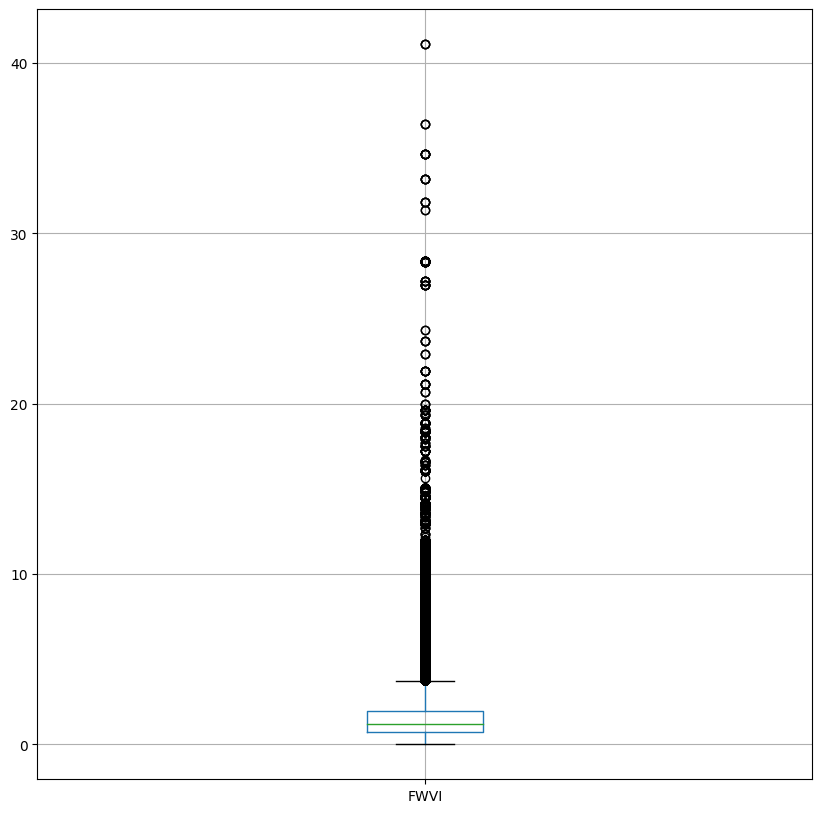

In [20]:
df_pubs_post2020.boxplot(column='FWVI', figsize=(10,10))

In [21]:
df_pubs_post2020.boxplot(column='FWCI', figsize=(10,10))

<AxesSubplot: >

### Creacion de metricas de calificacion de rising star

Crearemos varias metricas que usaremos para producir un score: Entre estos, se utilizara el numero de publicaciones, numero de publicaciones como primer autor, numero de publicaciones como autor singular, FWCI (Field Weighted Citation Impact), FWVI (Field Weighted View Impact), etc. Despues de hacer un analisis descriptivo de las variables, considerando su promedio y rango; se utilizara la siguiente tabla para calcular un score numerico. Una vez teniendo este score, se usara el maximo y minimo para normalizarlo a un rango entre 0 a 1.

In [22]:
query = 'SELECT df_pubs_pre2020.author_id, count(*) AS no_first_old FROM df_authors, df_pubs_pre2020 where df_authors.author_id = df_pubs_pre2020.author_id AND df_authors.author_id = df_pubs_pre2020.first_author_id GROUP BY df_authors.author_id'
prev_dict = pysqldf(query)
prev_dict['author_id'].replace(" ","")
dictionary = prev_dict.set_index('author_id').to_dict()['no_first_old']
translate = {}
for k, v in dictionary.items():
    #print("This is the key: '%s' and this is the value '%s'\n" % (k, v) )
    new_key = float(k.replace(' ', ''))
    translate[k] = new_key
    

for old, new in translate.items():
    dictionary[new] = dictionary.pop(old)
df_authors['no_first_old'] = df_authors['author_id'].map(dictionary)
df_authors['no_first_old'] = df_authors['no_first_old'].fillna(0)
df_authors['no_first_old'].value_counts()

0.0    4229
Name: no_first_old, dtype: int64

In [23]:
query = 'SELECT df_pubs_post2020.author_id, count(*) AS no_first_new FROM df_authors, df_pubs_post2020 where df_authors.author_id = df_pubs_post2020.author_id AND df_authors.author_id = df_pubs_post2020.first_author_id GROUP BY df_authors.author_id'
prev_dict = pysqldf(query)
prev_dict['author_id'].replace(" ","")
dictionary = prev_dict.set_index('author_id').to_dict()['no_first_new']
translate = {}
for k, v in dictionary.items():
    #print("This is the key: '%s' and this is the value '%s'\n" % (k, v) )
    new_key = float(k.replace(' ', ''))
    translate[k] = new_key
    

for old, new in translate.items():
    dictionary[new] = dictionary.pop(old)
df_authors['no_first_new'] = df_authors['author_id'].map(dictionary)
df_authors['no_first_new'] = df_authors['no_first_new'].fillna(0)
df_authors['no_first_new'].value_counts()

0.0    4228
2.0       1
Name: no_first_new, dtype: int64

In [24]:
query = 'SELECT df_pubs_pre2020.author_id, count(*) AS no_first_old FROM df_authors, df_pubs_pre2020 where df_authors.author_id = df_pubs_pre2020.author_id AND df_authors.author_id = df_pubs_pre2020.first_author_id GROUP BY df_authors.author_id'
prev_dict = pysqldf(query)
prev_dict['author_id'].replace(" ","")
dictionary = prev_dict.set_index('author_id').to_dict()['no_first_old']
translate = {}
for k, v in dictionary.items():
    #print("This is the key: '%s' and this is the value '%s'\n" % (k, v) )
    new_key = float(k.replace(' ', ''))
    translate[k] = new_key
    

for old, new in translate.items():
    dictionary[new] = dictionary.pop(old)
df_authors['no_first_old'] = df_authors['author_id'].map(dictionary)
df_authors['no_first_old'] = df_authors['no_first_old'].fillna(0)
df_authors['no_first_old'].value_counts()

0.0    4229
Name: no_first_old, dtype: int64

In [25]:
query = 'SELECT df_pubs_pre2020.author_id, count(*) AS no_pubs_old FROM df_authors, df_pubs_pre2020 where df_authors.author_id = df_pubs_pre2020.author_id GROUP BY df_authors.author_id'
prev_dict = pysqldf(query)
prev_dict['author_id'].replace(" ","")
dictionary = prev_dict.set_index('author_id').to_dict()['no_pubs_old']
translate = {}
for k, v in dictionary.items():
    #print("This is the key: '%s' and this is the value '%s'\n" % (k, v) )
    new_key = float(k.replace(' ', ''))
    translate[k] = new_key
    

for old, new in translate.items():
    dictionary[new] = dictionary.pop(old)
df_authors['no_pubs_old'] = df_authors['author_id'].map(dictionary)
df_authors['no_pubs_old'] = df_authors['no_pubs_old'].fillna(0)
df_authors['no_pubs_old'].value_counts()

1.0     2417
2.0      776
0.0      276
3.0      275
4.0      174
5.0       88
6.0       84
7.0       30
8.0       29
9.0       18
12.0      12
16.0       7
13.0       7
11.0       6
10.0       6
30.0       3
20.0       3
14.0       3
24.0       3
15.0       2
22.0       2
23.0       2
18.0       2
17.0       1
31.0       1
19.0       1
44.0       1
Name: no_pubs_old, dtype: int64

In [26]:
query = 'SELECT df_pubs_post2020.author_id, count(*) AS no_pubs_new FROM df_authors, df_pubs_post2020 where df_authors.author_id = df_pubs_post2020.author_id GROUP BY df_authors.author_id'
prev_dict = pysqldf(query)
prev_dict['author_id'].replace(" ","")
dictionary = prev_dict.set_index('author_id').to_dict()['no_pubs_new']
translate = {}
for k, v in dictionary.items():
    #print("This is the key: '%s' and this is the value '%s'\n" % (k, v) )
    new_key = float(k.replace(' ', ''))
    translate[k] = new_key
    

for old, new in translate.items():
    dictionary[new] = dictionary.pop(old)
df_authors['no_pubs_new'] = df_authors['author_id'].map(dictionary)
df_authors['no_pubs_new'] = df_authors['no_pubs_new'].fillna(0)
df_authors['no_pubs_new'].value_counts()

0.0     2826
1.0      687
2.0      330
3.0      114
4.0       80
5.0       52
6.0       42
7.0       18
9.0       17
12.0      10
13.0       9
8.0        8
10.0       6
14.0       4
19.0       3
30.0       3
84.0       3
16.0       3
23.0       2
11.0       2
15.0       2
25.0       1
33.0       1
26.0       1
21.0       1
32.0       1
18.0       1
29.0       1
97.0       1
Name: no_pubs_new, dtype: int64

In [27]:
query = 'SELECT df_pubs_pre2020.author_id, avg(df_pubs_pre2020.FWCI) AS avg_fwci_old FROM df_authors, df_pubs_pre2020 where df_authors.author_id = df_pubs_pre2020.author_id GROUP BY df_authors.author_id'
prev_dict = pysqldf(query)
prev_dict['author_id'].replace(" ","")
dictionary = prev_dict.set_index('author_id').to_dict()['avg_fwci_old']
translate = {}
for k, v in dictionary.items():
    #print("This is the key: '%s' and this is the value '%s'\n" % (k, v) )
    new_key = float(k.replace(' ', ''))
    translate[k] = new_key
    

for old, new in translate.items():
    dictionary[new] = dictionary.pop(old)
df_authors['avg_fwci_old'] = df_authors['author_id'].map(dictionary)
df_authors['avg_fwci_old'] = df_authors['avg_fwci_old'].fillna(0)
df_authors['avg_fwci_old'].value_counts()

0.000000    806
0.150000     54
0.450000     46
0.120000     43
0.290000     39
           ... 
6.720000      1
0.765000      1
0.462727      1
0.862500      1
2.257500      1
Name: avg_fwci_old, Length: 1087, dtype: int64

In [28]:
query = 'SELECT df_pubs_post2020.author_id, avg(df_pubs_post2020.FWCI) AS avg_fwci_new FROM df_authors, df_pubs_post2020 where df_authors.author_id = df_pubs_post2020.author_id GROUP BY df_authors.author_id'
prev_dict = pysqldf(query)
prev_dict['author_id'].replace(" ","")
dictionary = prev_dict.set_index('author_id').to_dict()['avg_fwci_new']
translate = {}
for k, v in dictionary.items():
    #print("This is the key: '%s' and this is the value '%s'\n" % (k, v) )
    new_key = float(k.replace(' ', ''))
    translate[k] = new_key
    

for old, new in translate.items():
    dictionary[new] = dictionary.pop(old)
df_authors['avg_fwci_new'] = df_authors['author_id'].map(dictionary)
df_authors['avg_fwci_new'] = df_authors['avg_fwci_new'].fillna(0)
df_authors['avg_fwci_new'].value_counts()

0.000000    3055
0.240000      14
0.310000      13
0.420000      10
0.340000       9
            ... 
0.330000       1
2.240000       1
0.904000       1
0.863333       1
0.536667       1
Name: avg_fwci_new, Length: 668, dtype: int64

In [29]:
query = 'SELECT df_pubs_pre2020.author_id, avg(df_pubs_pre2020.FWVI) AS avg_fwvi_old FROM df_authors, df_pubs_pre2020 where df_authors.author_id = df_pubs_pre2020.author_id GROUP BY df_authors.author_id'
prev_dict = pysqldf(query)
prev_dict['author_id'].replace(" ","")
dictionary = prev_dict.set_index('author_id').to_dict()['avg_fwvi_old']
translate = {}
for k, v in dictionary.items():
    #print("This is the key: '%s' and this is the value '%s'\n" % (k, v) )
    new_key = float(k.replace(' ', ''))
    translate[k] = new_key
    

for old, new in translate.items():
    dictionary[new] = dictionary.pop(old)
df_authors['avg_fwvi_old'] = df_authors['author_id'].map(dictionary)
df_authors['avg_fwvi_old'] = df_authors['avg_fwvi_old'].fillna(0)
df_authors['avg_fwvi_old'].value_counts()

0.000000    303
1.010000     29
0.860000     29
0.760000     28
0.890000     27
           ... 
1.385714      1
0.685000      1
1.428333      1
1.022500      1
1.790714      1
Name: avg_fwvi_old, Length: 1161, dtype: int64

In [30]:
query = 'SELECT df_pubs_post2020.author_id, avg(df_pubs_post2020.FWVI) AS avg_fwvi_new FROM df_authors, df_pubs_post2020 where df_authors.author_id = df_pubs_post2020.author_id GROUP BY df_authors.author_id'
prev_dict = pysqldf(query)
prev_dict['author_id'].replace(" ","")
dictionary = prev_dict.set_index('author_id').to_dict()['avg_fwvi_new']
translate = {}
for k, v in dictionary.items():
    #print("This is the key: '%s' and this is the value '%s'\n" % (k, v) )
    new_key = float(k.replace(' ', ''))
    translate[k] = new_key
    

for old, new in translate.items():
    dictionary[new] = dictionary.pop(old)
df_authors['avg_fwvi_new'] = df_authors['author_id'].map(dictionary)
df_authors['avg_fwvi_new'] = df_authors['avg_fwvi_new'].fillna(0)
df_authors['avg_fwvi_new'].value_counts()

0.000000    2831
0.740000      12
0.820000      12
0.650000      11
0.770000      11
            ... 
2.330000       1
1.565000       1
1.890000       1
2.273333       1
2.200000       1
Name: avg_fwvi_new, Length: 705, dtype: int64

In [31]:
query = 'SELECT df_pubs_pre2020.author_id, avg(df_pubs_pre2020.citeScore) AS avg_citescore_old FROM df_authors, df_pubs_pre2020 where df_authors.author_id = df_pubs_pre2020.author_id GROUP BY df_authors.author_id'
prev_dict = pysqldf(query)
prev_dict['author_id'].replace(" ","")
dictionary = prev_dict.set_index('author_id').to_dict()['avg_citescore_old']
translate = {}
for k, v in dictionary.items():
    #print("This is the key: '%s' and this is the value '%s'\n" % (k, v) )
    new_key = float(k.replace(' ', ''))
    translate[k] = new_key
    

for old, new in translate.items():
    dictionary[new] = dictionary.pop(old)
df_authors['avg_citescore_old'] = df_authors['author_id'].map(dictionary)
df_authors['avg_citescore_old'] = df_authors['avg_citescore_old'].fillna(0)
df_authors['avg_citescore_old'].value_counts()

0.000000    589
0.700000     79
1.000000     79
0.100000     74
0.600000     73
           ... 
9.975000      1
5.850000      1
0.400000      1
1.733333      1
6.228571      1
Name: avg_citescore_old, Length: 761, dtype: int64

In [32]:
query = 'SELECT df_pubs_post2020.author_id, avg(df_pubs_post2020.citeScore) AS avg_citescore_new FROM df_authors, df_pubs_post2020 where df_authors.author_id = df_pubs_post2020.author_id GROUP BY df_authors.author_id'
prev_dict = pysqldf(query)
prev_dict['author_id'].replace(" ","")
dictionary = prev_dict.set_index('author_id').to_dict()['avg_citescore_new']
translate = {}
for k, v in dictionary.items():
    #print("This is the key: '%s' and this is the value '%s'\n" % (k, v) )
    new_key = float(k.replace(' ', ''))
    translate[k] = new_key
    

for old, new in translate.items():
    dictionary[new] = dictionary.pop(old)
df_authors['avg_citescore_new'] = df_authors['author_id'].map(dictionary)
df_authors['avg_citescore_new'] = df_authors['avg_citescore_new'].fillna(0)
df_authors['avg_citescore_new'].value_counts()

0.000000    2857
5.900000      23
0.900000      21
5.000000      18
4.200000      18
            ... 
9.720000       1
7.966667       1
5.680000       1
2.566667       1
8.833333       1
Name: avg_citescore_new, Length: 539, dtype: int64

In [33]:
df_authors

,author_id,scholarly_output,citations_per_pub,most_recent_pub,citations,FWCI,h_index,FW_output_in_top,oldest_pub,no_pubs,no_first_old,no_first_new,no_pubs_old,no_pubs_new,avg_fwci_old,avg_fwci_new,avg_fwvi_old,avg_fwvi_new,avg_citescore_old,avg_citescore_new
0,6.503894e+09,1,20.0,2017,20,0.54,4,0,2017,6.0,0.0,0.0,6.0,0.0,0.303333,0.000000,1.773333,0.00,2.100000,0.000000
1,6.503977e+09,1,0.0,2017,0,0.00,1,0,2017,1.0,0.0,0.0,1.0,0.0,0.000000,0.000000,1.460000,0.00,0.100000,0.000000
2,6.504128e+09,4,4.8,2019,19,0.35,13,0,2017,6.0,0.0,0.0,2.0,1.0,0.320000,0.230000,0.895000,0.63,2.750000,1.500000
3,6.504301e+09,1,20.0,2017,20,0.54,3,0,2017,6.0,0.0,0.0,6.0,0.0,0.303333,0.000000,1.773333,0.00,2.100000,0.000000
4,6.504401e+09,2,15.0,2018,30,1.68,3,0,2017,1.0,0.0,0.0,1.0,0.0,2.190000,0.000000,2.670000,0.00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4224,5.770648e+10,1,773.0,2017,773,37.42,1,1,2017,1.0,0.0,0.0,1.0,0.0,37.420000,0.000000,7.070000,0.00,54.900000,0.000000
4225,5.773512e+10,1,0.0,2017,0,0.00,0,0,2017,1.0,0.0,0.0,1.0,0.0,0.000000,0.000000,1.450000,0.00,0.000000,0.000000
4226,5.774357e+10,2,0.5,2018,1,0.00,1,0,2017,2.0,0.0,0.0,2.0,0.0,0.000000,0.000000,0.395000,0.00,0.150000,0.000000
4227,5.777048e+10,2,0.5,2020,1,0.34,1,0,2017,1.0,0.0,0.0,1.0,0.0,0.690000,0.000000,0.690000,0.00,0.000000,0.000000


In [34]:
df_authors.describe()

,author_id,scholarly_output,citations_per_pub,most_recent_pub,citations,FWCI,h_index,FW_output_in_top,oldest_pub,no_pubs,no_first_old,no_first_new,no_pubs_old,no_pubs_new,avg_fwci_old,avg_fwci_new,avg_fwvi_old,avg_fwvi_new,avg_citescore_old,avg_citescore_new
count,4.229000e+03,4229.000000,4229.000000,4229.000000,4229.000000,4229.000000,4229.000000,4229.000000,4229.0,4229.000000,4229.0,4229.000000,4229.000000,4229.000000,4229.000000,4229.000000,4229.000000,4229.000000,4229.000000,4229.000000
mean,5.374435e+10,3.428707,14.410192,2018.624025,47.841334,1.013559,3.921731,0.382596,2017.0,3.227004,0.0,0.000473,1.901632,0.956018,0.906461,0.356264,1.339878,0.460112,4.021644,2.068651
std,1.105750e+10,5.051573,71.069002,1.919390,204.779281,3.464194,6.960170,1.295045,0.0,8.817691,0.0,0.030755,2.402846,3.516209,2.086560,1.084545,1.038171,1.035423,5.098450,4.365860
min,6.503894e+09,1.000000,0.000000,2017.000000,0.000000,0.000000,0.000000,0.000000,2017.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.719120e+10,1.000000,2.500000,2017.000000,4.000000,0.240000,1.000000,0.000000,2017.0,1.000000,0.0,0.000000,1.000000,0.000000,0.140000,0.000000,0.740000,0.000000,0.733333,0.000000
50%,5.719419e+10,2.000000,6.000000,2017.000000,13.000000,0.570000,2.000000,0.000000,2017.0,1.000000,0.0,0.000000,1.000000,0.000000,0.495263,0.000000,1.150000,0.000000,3.033333,0.000000
75%,5.719622e+10,4.000000,13.000000,2020.000000,34.000000,1.070000,4.000000,0.000000,2017.0,3.000000,0.0,0.000000,2.000000,1.000000,1.060000,0.240000,1.695000,0.760000,5.500000,3.100000
max,5.778728e+10,85.000000,2058.000000,2023.000000,7785.000000,97.650000,146.000000,28.000000,2017.0,228.000000,0.0,2.000000,44.000000,97.000000,72.680000,22.950000,15.170000,28.300000,54.900000,68.700000


In [35]:
df_authors['oldScore'] = np.clip(df_authors['no_pubs_old']*2,0,10) + np.clip(df_authors['no_first_old']*4,0,10) + np.clip(df_authors['avg_fwci_old']*9.64,0,10) + np.clip(df_authors['avg_fwvi_old']*5.40,0,10) + np.clip(df_authors['avg_citescore_old']*1.66,0,10)

In [36]:
df_authors['newScore'] = np.clip(df_authors['no_pubs_new']*4,0,10) + np.clip(df_authors['no_first_new']*4,0,10) + np.clip(df_authors['avg_fwci_new']*10.95,0,10) + np.clip(df_authors['avg_fwvi_new']*6.10,0,10) + np.clip(df_authors['avg_citescore_new']*1.42,0,10)

In [37]:
df_authors['oldScore']=(df_authors['oldScore']-df_authors['oldScore'].min())/(df_authors['oldScore'].max()-df_authors['oldScore'].min())
df_authors['newScore']=(df_authors['newScore']-df_authors['newScore'].min())/(df_authors['newScore'].max()-df_authors['newScore'].min())

In [38]:
df_authors

,author_id,scholarly_output,citations_per_pub,most_recent_pub,citations,FWCI,h_index,FW_output_in_top,oldest_pub,no_pubs,...,no_pubs_old,no_pubs_new,avg_fwci_old,avg_fwci_new,avg_fwvi_old,avg_fwvi_new,avg_citescore_old,avg_citescore_new,oldScore,newScore
0,6.503894e+09,1,20.0,2017,20,0.54,4,0,2017,6.0,...,6.0,0.0,0.303333,0.000000,1.773333,0.00,2.100000,0.000000,0.649653,0.000000
1,6.503977e+09,1,0.0,2017,0,0.00,1,0,2017,1.0,...,1.0,0.0,0.000000,0.000000,1.460000,0.00,0.100000,0.000000,0.251250,0.000000
2,6.504128e+09,4,4.8,2019,19,0.35,13,0,2017,6.0,...,2.0,1.0,0.320000,0.230000,0.895000,0.63,2.750000,1.500000,0.412070,0.312287
3,6.504301e+09,1,20.0,2017,20,0.54,3,0,2017,6.0,...,6.0,0.0,0.303333,0.000000,1.773333,0.00,2.100000,0.000000,0.649653,0.000000
4,6.504401e+09,2,15.0,2018,30,1.68,3,0,2017,1.0,...,1.0,0.0,2.190000,0.000000,2.670000,0.00,0.000000,0.000000,0.550000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4224,5.770648e+10,1,773.0,2017,773,37.42,1,1,2017,1.0,...,1.0,0.0,37.420000,0.000000,7.070000,0.00,54.900000,0.000000,0.800000,0.000000
4225,5.773512e+10,1,0.0,2017,0,0.00,0,0,2017,1.0,...,1.0,0.0,0.000000,0.000000,1.450000,0.00,0.000000,0.000000,0.245750,0.000000
4226,5.774357e+10,2,0.5,2018,1,0.00,1,0,2017,2.0,...,2.0,0.0,0.000000,0.000000,0.395000,0.00,0.150000,0.000000,0.159550,0.000000
4227,5.777048e+10,2,0.5,2020,1,0.34,1,0,2017,1.0,...,1.0,0.0,0.690000,0.000000,0.690000,0.00,0.000000,0.000000,0.309440,0.000000


In [39]:
df_authors['scoreIncrease'] = df_authors['newScore'] - df_authors['oldScore']

In [40]:
df_authors['scoreIncrease'].describe()

count    4229.000000
mean       -0.272199
std         0.384703
min        -1.000000
25%        -0.563080
50%        -0.331840
75%        -0.050000
max         1.000000
Name: scoreIncrease, dtype: float64

In [41]:
df_authors['risingStar'] = df_authors['scoreIncrease'] > 0

In [42]:
df_authors

,author_id,scholarly_output,citations_per_pub,most_recent_pub,citations,FWCI,h_index,FW_output_in_top,oldest_pub,no_pubs,...,avg_fwci_old,avg_fwci_new,avg_fwvi_old,avg_fwvi_new,avg_citescore_old,avg_citescore_new,oldScore,newScore,scoreIncrease,risingStar
0,6.503894e+09,1,20.0,2017,20,0.54,4,0,2017,6.0,...,0.303333,0.000000,1.773333,0.00,2.100000,0.000000,0.649653,0.000000,-0.649653,False
1,6.503977e+09,1,0.0,2017,0,0.00,1,0,2017,1.0,...,0.000000,0.000000,1.460000,0.00,0.100000,0.000000,0.251250,0.000000,-0.251250,False
2,6.504128e+09,4,4.8,2019,19,0.35,13,0,2017,6.0,...,0.320000,0.230000,0.895000,0.63,2.750000,1.500000,0.412070,0.312287,-0.099782,False
3,6.504301e+09,1,20.0,2017,20,0.54,3,0,2017,6.0,...,0.303333,0.000000,1.773333,0.00,2.100000,0.000000,0.649653,0.000000,-0.649653,False
4,6.504401e+09,2,15.0,2018,30,1.68,3,0,2017,1.0,...,2.190000,0.000000,2.670000,0.00,0.000000,0.000000,0.550000,0.000000,-0.550000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4224,5.770648e+10,1,773.0,2017,773,37.42,1,1,2017,1.0,...,37.420000,0.000000,7.070000,0.00,54.900000,0.000000,0.800000,0.000000,-0.800000,False
4225,5.773512e+10,1,0.0,2017,0,0.00,0,0,2017,1.0,...,0.000000,0.000000,1.450000,0.00,0.000000,0.000000,0.245750,0.000000,-0.245750,False
4226,5.774357e+10,2,0.5,2018,1,0.00,1,0,2017,2.0,...,0.000000,0.000000,0.395000,0.00,0.150000,0.000000,0.159550,0.000000,-0.159550,False
4227,5.777048e+10,2,0.5,2020,1,0.34,1,0,2017,1.0,...,0.690000,0.000000,0.690000,0.00,0.000000,0.000000,0.309440,0.000000,-0.309440,False


In [43]:
df_authors['risingStar'].value_counts()

False    3296
True      933
Name: risingStar, dtype: int64

# DataSet
Resultados finales se guardaran en dos datasets
- El primero 'UncleanDataToPredict' tiene las columnas usadas para calcular el score
- El segundo 'CleanDataToPredict' tiene solo la columna a predecir 'risingStar'

In [44]:
df_authors.to_csv('UncleanDataToPredict')

In [ ]:
df_authors.drop(columns=['noPubs','avg'])